# Store Sales time-series Forecasting 

In [1]:
import glob
import os
import pandas as pd
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import locale
locale.setlocale(locale.LC_ALL, '')
pd.set_option('display.float_format', '{:,.3f}'.format)

__loading data__

In [4]:
files = os.listdir('c:/data/store-sales-time-series-forecasting')
names = []
for i in files:
    names.append(i.split('.csv')[0])
names

['holidays_events',
 'oil',
 'sample_submission',
 'stores',
 'test',
 'train',
 'transactions']

In [5]:
g_list = glob.glob('c:/data/store-sales-time-series-forecasting/*')

In [6]:
df = {name : pd.read_csv(g_list[idx]) for idx, name in enumerate(names)}
df

{'holidays_events':            date        type    locale locale_name  \
 0    2012-03-02     Holiday     Local       Manta   
 1    2012-04-01     Holiday  Regional    Cotopaxi   
 2    2012-04-12     Holiday     Local      Cuenca   
 3    2012-04-14     Holiday     Local    Libertad   
 4    2012-04-21     Holiday     Local    Riobamba   
 ..          ...         ...       ...         ...   
 345  2017-12-22  Additional  National     Ecuador   
 346  2017-12-23  Additional  National     Ecuador   
 347  2017-12-24  Additional  National     Ecuador   
 348  2017-12-25     Holiday  National     Ecuador   
 349  2017-12-26  Additional  National     Ecuador   
 
                        description  transferred  
 0               Fundacion de Manta        False  
 1    Provincializacion de Cotopaxi        False  
 2              Fundacion de Cuenca        False  
 3        Cantonizacion de Libertad        False  
 4        Cantonizacion de Riobamba        False  
 ..                      

### train / test

In [29]:
df['train'].head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


__store_nbr__ identifies the store at which the products are sold.     
__family__ identifies the type of product sold.    
__sales__ gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).    
__onpromotion__ gives the total number of items in a product family that were being promoted at a store at a given date.

In [44]:
print('Numbers of null in train data :\n{}'.format(df['train'].isnull().sum()))
print('Numbers of null in test data :\n{}'.format(df['test'].isnull().sum()))

Numbers of null in train data :
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
Numbers of null in test data :
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64


In [45]:
print('Numbers of unique values in train data :\n{}'.format(df['train'].nunique()))
print('Numbers of unique values in test data :\n{}'.format(df['test'].nunique()))

Numbers of unique values in train data :
id             3000888
date              1684
store_nbr           54
family              33
sales           379610
onpromotion        362
dtype: int64
Numbers of unique values in test data :
id             28512
date              16
store_nbr         54
family            33
onpromotion      212
dtype: int64


In [46]:
df['train'].store_nbr.unique()

array([ 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2, 20, 21, 22, 23, 24,
       25, 26, 27, 28, 29,  3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,  4,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49,  5, 50, 51, 52, 53, 54,  6,
        7,  8,  9], dtype=int64)

In [47]:
df['train'].family.unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [48]:
df['train'].onpromotion.unique()

array([  0,   3,   5,   1,  56,  20,  19,   2,   4,  18,  17,  12,   6,
         7,  10,   9,  50,   8,  16,  42,  51,  13,  15,  47,  21,  40,
        37,  54,  24,  58,  22,  59,  11,  45,  25,  55,  26,  43,  35,
        14,  28,  46,  36,  32,  53,  57,  27,  39,  41,  30,  29,  49,
        23,  48,  44,  38,  31,  52,  33,  34,  61,  60, 116,  86,  73,
       113, 102,  68, 104,  93,  70,  92, 121,  72, 178, 174, 161, 118,
       105, 172, 163, 167, 142, 154, 133, 180, 181, 173, 165, 168, 186,
       140, 149, 145, 169, 188,  62,  84, 111,  65, 107,  63, 101,  87,
       125,  94, 114, 171, 153, 170, 166, 141, 155, 179, 192, 131, 147,
       151, 189,  79,  74, 110,  64,  67,  99, 123, 157, 117, 150, 182,
       162, 160, 194, 135, 190,  69, 108,  89, 126, 156, 103, 146, 132,
       177, 164, 176, 112,  75, 109,  91, 128, 175, 187, 148, 137, 184,
       196, 144, 158, 119, 106,  66, 100,  90, 120, 115,  98, 159, 152,
       185, 139, 143,  80, 124,  71, 134, 193,  78,  88, 122, 13

In [49]:
df['train'].sales.unique()

array([0.000000e+00, 2.000000e+00, 8.100000e+02, ..., 4.381330e+02,
       1.545530e+02, 2.419729e+03])

### stores / oil / transactions

In [51]:
df['stores'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [53]:
df['stores'].head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [63]:
df['oil'].isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [139]:
df['transactions'].head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [140]:
df['transactions'].nunique()

date            1682
store_nbr         54
transactions    4993
dtype: int64

### holidays events

In [64]:
df['holidays_events'].head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [65]:
df['holidays_events'].nunique()

date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

In [73]:
print('Type of type columns : \n{}'.format(list(df['holidays_events'].type.unique())))
print('Type of locale columns : \n{}'.format(list(df['holidays_events'].locale.unique())))
print('Type of locale_name columns : \n{}'.format(list(df['holidays_events'].locale_name.unique())))
print('Type of transferred  columns : \n{}'.format(list(df['holidays_events'].transferred .unique())))

Type of type columns : 
['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event']
Type of locale columns : 
['Local', 'Regional', 'National']
Type of locale_name columns : 
['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo', 'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo', 'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato', 'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas', 'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil']
Type of transferred  columns : 
[False, True]


In [105]:
print('Numbers of type columns : \n{}'.format(df['holidays_events'].type.value_counts()))
print('\nNumbers of locale columns : \n{}'.format(df['holidays_events'].locale.value_counts()))
print('\nNumbers of locale_name columns : \n{}'.format(df['holidays_events'].locale_name.value_counts()))
print('\nNumbers of transferred  columns : \n{}'.format(df['holidays_events'].transferred.value_counts()))

Numbers of type columns : 
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

Numbers of locale columns : 
National    174
Local       152
Regional     24
Name: locale, dtype: int64

Numbers of locale_name columns : 
Ecuador                           174
Quito                              13
Riobamba                           12
Guaranda                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Salinas                             6
Loja                                6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Quevedo                             6
Manta                               6
Esmeraldas                          6
Cotopaxi                            6
El Carmen                           6
Santo Domingo   

In [111]:
print('Numbers of holiday before transferred : {}'.format(len(df['holidays_events'].loc[df['holidays_events']['transferred']==True,])))
df['holidays_events'].loc[df['holidays_events']['transferred']==True,]

Numbers of holiday before transferred : 12


,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


In [112]:
print('Numbers of holiday transferred : {}'.format(len(df['holidays_events'].loc[df['holidays_events'].type=='Transfer',])))
df['holidays_events'].loc[df['holidays_events'].type=='Transfer',]

Numbers of holiday transferred : 12


,date,type,locale,locale_name,description,transferred
20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, which means it was celebrated on 2012-10-12.    
    Let's update Transfer to Holiday and remove transferred day.

In [7]:
df['holidays_events'].loc[df['holidays_events'].type=='Transfer','type'] = 'Holiday'

In [133]:
df['holidays_events'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [8]:
df['holidays_events'] = df['holidays_events'].drop(df['holidays_events'][df['holidays_events']['transferred']==True].index).reset_index(drop=True)

When merge two DF, Using date and locale_name columns. So, check the duplication of df['holiday_events'].

In [9]:
df['holidays_events'][df['holidays_events'].duplicated(['date','locale_name'],keep=False)]

,date,type,locale,locale_name,description,transferred
34,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
35,2012-12-24,Additional,National,Ecuador,Navidad-1,False
38,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
39,2012-12-31,Additional,National,Ecuador,Primer dia del ano-1,False
153,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
154,2014-12-26,Additional,National,Ecuador,Navidad+1,False
232,2016-05-01,Holiday,National,Ecuador,Dia del Trabajo,False
233,2016-05-01,Event,National,Ecuador,Terremoto Manabi+15,False
239,2016-05-07,Additional,National,Ecuador,Dia de la Madre-1,False
240,2016-05-07,Event,National,Ecuador,Terremoto Manabi+21,False


Drop the 5 Additional types, 2 Event types(Terremoto Manabi+15,Terremoto Manabi+22) 

In [10]:
df['holidays_events'][(df['holidays_events'].duplicated(['date','locale_name'],keep=False))&(df['holidays_events'].type=='Additional')]

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Additional,National,Ecuador,Navidad-1,False
39,2012-12-31,Additional,National,Ecuador,Primer dia del ano-1,False
154,2014-12-26,Additional,National,Ecuador,Navidad+1,False
239,2016-05-07,Additional,National,Ecuador,Dia de la Madre-1,False
260,2016-07-24,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False


In [11]:
drop_idx = df['holidays_events'][(df['holidays_events'].duplicated(['date','locale_name'],keep=False))&(df['holidays_events'].type=='Additional')].index
df['holidays_events'].drop(drop_idx,inplace=True)

In [12]:
drop_idx = df['holidays_events'][(df['holidays_events'].duplicated(['date','locale_name'],keep=False))&(df['holidays_events'].description.str.contains('Terremoto Manabi'))].index
df['holidays_events'].drop(drop_idx,inplace=True)

In [13]:
df['holidays_events'].duplicated(['date','locale_name'],keep=False).sum()

0

### Merge dataset

In [141]:
df.keys()

dict_keys(['holidays_events', 'oil', 'sample_submission', 'stores', 'test', 'train', 'transactions'])

In [48]:
train = pd.merge(df['train'],df['stores'],on='store_nbr',how='left')
test = pd.merge(df['test'],df['stores'],on='store_nbr',how='left')

In [49]:
train = pd.merge(train,df['oil'],on='date',how='left')
test = pd.merge(test,df['oil'],on='date',how='left')

In [50]:
train = pd.merge(train,df['transactions'],on=['date','store_nbr'],how='left')
test = pd.merge(test,df['transactions'],on=['date','store_nbr'],how='left')

In [51]:
train = pd.merge(train,df['holidays_events'],left_on=['date','city'],right_on=['date','locale_name'],how='left')
test = pd.merge(test,df['holidays_events'],left_on=['date','city'],right_on=['date','locale_name'],how='left')

In [274]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,transactions,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
train.tail()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,transactions,type_y,locale,locale_name,description,transferred
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.570,"2,155.000",NaN,NaN,NaN,NaN,NaN
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.570,"2,155.000",NaN,NaN,NaN,NaN,NaN
3000885,3000885,2017-08-15,9,PRODUCE,"2,419.729",148,Quito,Pichincha,B,6,47.570,"2,155.000",NaN,NaN,NaN,NaN,NaN
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.570,"2,155.000",NaN,NaN,NaN,NaN,NaN
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0,Quito,Pichincha,B,6,47.570,"2,155.000",NaN,NaN,NaN,NaN,NaN


In [291]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   type_x        object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  transactions  float64
 12  type_y        object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   object 
dtypes: float64(3), int64(4), object(10)
memory usage: 412.1+ MB


In [70]:
train.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
dcoilwtico       928422
transactions     245784
type_y          2989008
locale          2989008
locale_name     2989008
description     2989008
transferred     2989008
day                   0
dtype: int64

In [54]:
train['date'] = pd.to_datetime(train['date'],format='%Y-%m-%d')
test['date'] = pd.to_datetime(test['date'],format='%Y-%m-%d')

In [58]:
train['day'] = train['date'].dt.day_name()
test['day'] = test['date'].dt.day_name()

In [77]:
train.loc[(train.type_y.isna())&(~train.day.isin(['Saturday','Sunday'])),'type_y'] = 'Weekday'

In [84]:
train.loc[(train.type_y.isna())&(train.day.isin(['Saturday','Sunday'])),'type_y'] = 'Weekend'

In [90]:
test.loc[(test.type_y.isna())&(~test.day.isin(['Saturday','Sunday'])),'type_y'] = 'Weekday'
test.loc[(test.type_y.isna())&(test.day.isin(['Saturday','Sunday'])),'type_y'] = 'Weekend'

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 18 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   city          object        
 7   state         object        
 8   type_x        object        
 9   cluster       int64         
 10  dcoilwtico    float64       
 11  transactions  float64       
 12  type_y        object        
 13  locale        object        
 14  locale_name   object        
 15  description   object        
 16  transferred   object        
 17  day           object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(10)
memory usage: 435.0+ MB


In [93]:
train.nunique()

id              3000888
date               1684
store_nbr            54
family               33
sales            379610
onpromotion         362
city                 22
state                16
type_x                5
cluster              17
dcoilwtico          994
transactions       4993
type_y                4
locale                1
locale_name          19
description          26
transferred           1
day                   7
dtype: int64

In [112]:
train = train[['sales','day','store_nbr','family','onpromotion','city','state','type_x','cluster','dcoilwtico','transactions','type_y']]
test = test[['id','day','store_nbr','family','onpromotion','city','state','type_x','cluster','dcoilwtico','transactions','type_y']]

<AxesSubplot:>

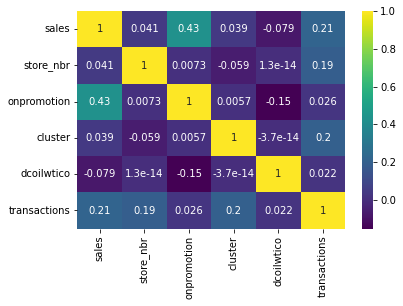

In [113]:
sns.heatmap(train.corr(),annot=True,cmap='viridis')

__store nbr__

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

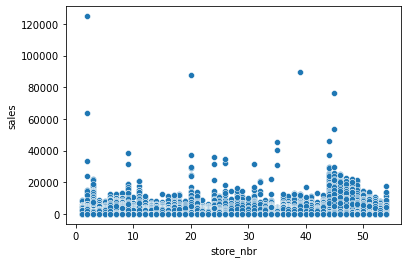

In [99]:
sns.scatterplot(data=train,x='store_nbr',y='sales')

In [102]:
train.groupby(['store_nbr'],as_index=False).sales.agg(['count','median','mean','std','max']).sort_values(by='median',ascending=False)

,count,median,mean,std,max
store_nbr,,,,,
44,55572,75.000,"1,117.245","2,685.282","46,271.000"
3,55572,64.000,908.405,"2,146.185","21,858.000"
45,55572,62.000,980.674,"2,384.321","76,090.000"
47,55572,51.000,916.798,"2,222.317","23,024.000"
49,55572,48.000,781.330,"1,897.862","21,190.000"
8,55572,39.000,548.735,"1,275.424","13,511.000"
46,55572,36.000,753.906,"1,889.013","25,238.000"
50,55572,32.000,515.602,"1,280.878","14,431.000"
48,55572,30.000,646.605,"1,668.494","22,255.000"


__family__

<AxesSubplot:xlabel='family', ylabel='sales'>

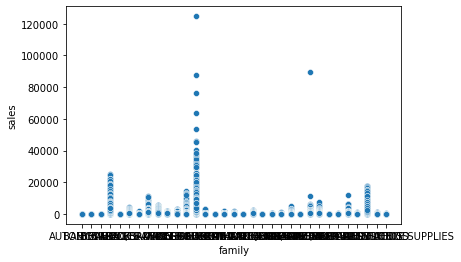

In [103]:
sns.scatterplot(data=train,x='family',y='sales')

In [95]:
train.store_nbr.value_counts()

1     55572
46    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
47    55572
10    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
35    55572
34    55572
33    55572
32    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
9     55572
Name: store_nbr, dtype: int64

In [26]:
train[train.dcoilwtico.isna()]['type_y'].value_counts()

Holiday       3366
Additional     594
Name: type_y, dtype: int64

In [30]:
day = train.loc[train.dcoilwtico.isna(),'date']

In [44]:
pd.to_datetime(day,format='%Y-%m-%d').dt.day_name().value_counts()

Saturday     429462
Sunday       427680
Monday        40986
Friday        14256
Thursday      10692
Tuesday        3564
Wednesday      1782
Name: date, dtype: int64

In [45]:
train.loc[train.dcoilwtico.isna(),['date','type_y']]

,date,type_y
0,2013-01-01,NaN
1,2013-01-01,NaN
2,2013-01-01,NaN
3,2013-01-01,NaN
4,2013-01-01,NaN
...,...,...
2997319,2017-08-13,NaN
2997320,2017-08-13,NaN
2997321,2017-08-13,NaN
2997322,2017-08-13,NaN


In [18]:
train.describe()

,id,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions
count,"3,000,888.000","3,000,888.000","3,000,888.000","3,000,888.000","3,000,888.000","2,072,466.000","2,755,104.000"
mean,"1,500,443.500",27.500,357.776,2.603,8.481,67.926,"1,694.602"
std,"866,281.892",15.586,"1,101.998",12.219,4.650,25.666,963.281
min,0.000,1.000,0.000,0.000,1.000,26.190,5.000
25%,"750,221.750",14.000,0.000,0.000,4.000,46.380,"1,046.000"
50%,"1,500,443.500",27.500,11.000,0.000,8.500,53.330,"1,393.000"
75%,"2,250,665.250",41.000,195.847,0.000,13.000,95.800,"2,079.000"
max,"3,000,887.000",54.000,"124,717.000",741.000,17.000,110.620,"8,359.000"
